
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns()
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

&nbsp; e) Find all rows where the freetime is NaN.   

&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

In [1]:
import pandas as pd

# a)
student_data = pd.read_csv("../Data/student-mat-missing-data.csv")
student_data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


In [2]:
# b)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [3]:
student_data.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,197.000000,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,114.170924,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [4]:
student_data.value_counts()

Unnamed: 0  school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0           GP      F    18.0  U        GT3      A        4     4     at_home   teacher   course  mother    2           2          0         yes        no      no    no          yes      yes     no        no        4.0     3.0       4.0    1     1     3.0     6.0       5   6   6     1
1           GP      F    17.0  U        GT3      T        1     1     at_home   other     course  father    1           2          0         no         yes     no    no          no       yes     yes       no        5.0     3.0       3.0    1     1     3.0     4.0       5   5   6     1
2           GP      F    15.0  U        LE3      T        1     1     at_home   other     other   mother    1           2          3         yes   

In [5]:
student_data.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

c:\Users\mohse\Desktop\Databehandling-Mohsen-Mohseni\Exercises\data_utils.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='Set2')


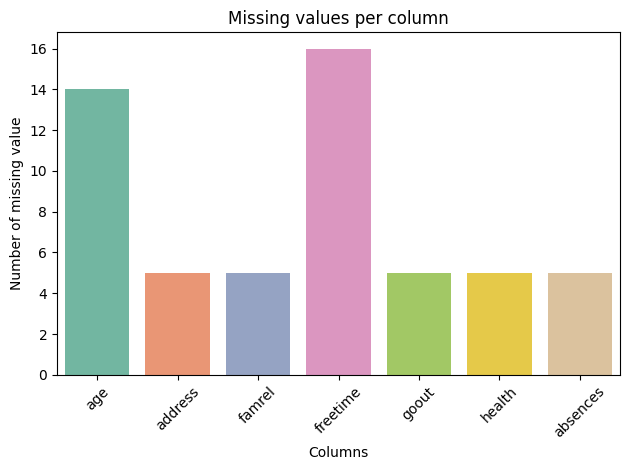

In [6]:
# d)
import pandas as pd
from data_utils import plot_missing_value

df = pd.read_csv("../Data/student-mat-missing-data.csv")

plot_missing_value(df)

In [7]:
# e)
print(student_data[student_data["freetime"].isnull()].index.tolist())

[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


In [8]:
# f)
student_data[student_data["freetime"].isnull() | student_data["age"].isnull()].index.tolist

<bound method IndexOpsMixin.tolist of Index([ 20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214,
       257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385],
      dtype='int64')>

In [9]:
# g)
nan_per_row = student_data.isnull().sum(axis=1)
rows_with_more_than_one_nan = nan_per_row > 1 
proportion = rows_with_more_than_one_nan.sum() / len(student_data)

print(f"These rows constitites {proportion:.4f} of the dataset")

These rows constitites 0.0127 of the dataset


---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 

&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
```

d)

```python

array(['yes', 'no'], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

c:\Users\mohse\Desktop\Databehandling-Mohsen-Mohseni\Exercises\data_utils.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='Set2')


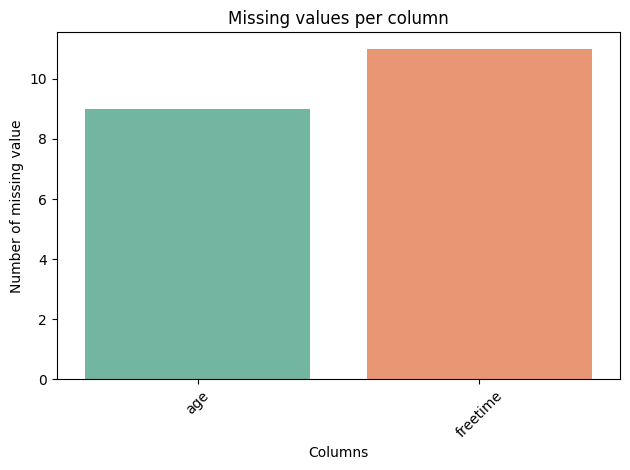

In [11]:
# a)
from data_utils import plot_missing_value

student_data_cleaned = student_data[~rows_with_more_than_one_nan]
plot_missing_value(student_data_cleaned)

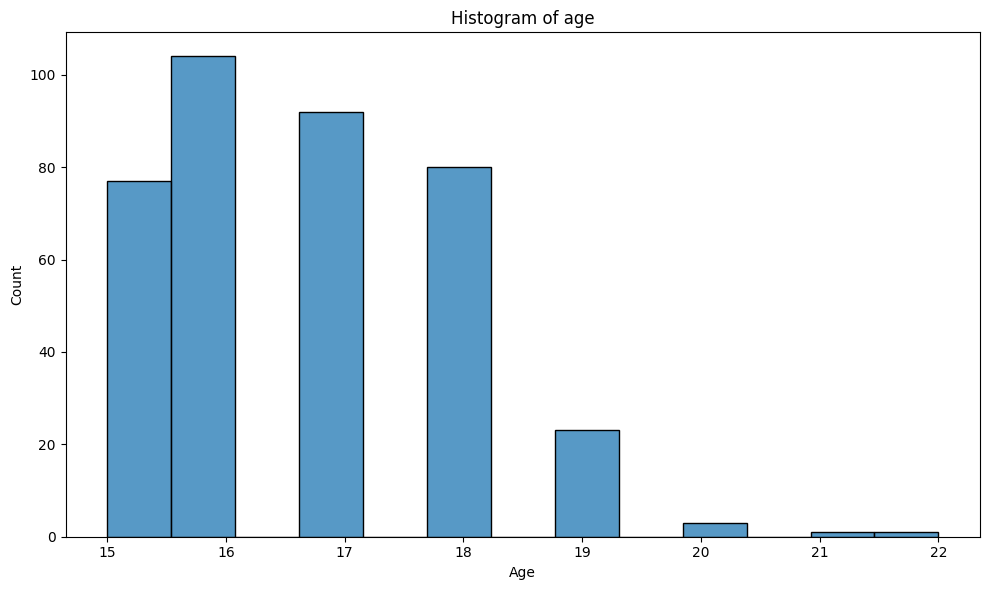

In [12]:
# b)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=student_data_cleaned, x='age')

plt.title("Histogram of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(int(student_data['age'].min()), int(student_data['age'].max()) + 1))
#plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# c)
student_data.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
# d)
student_data["higher"].unique()

array(['yes', 'no'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

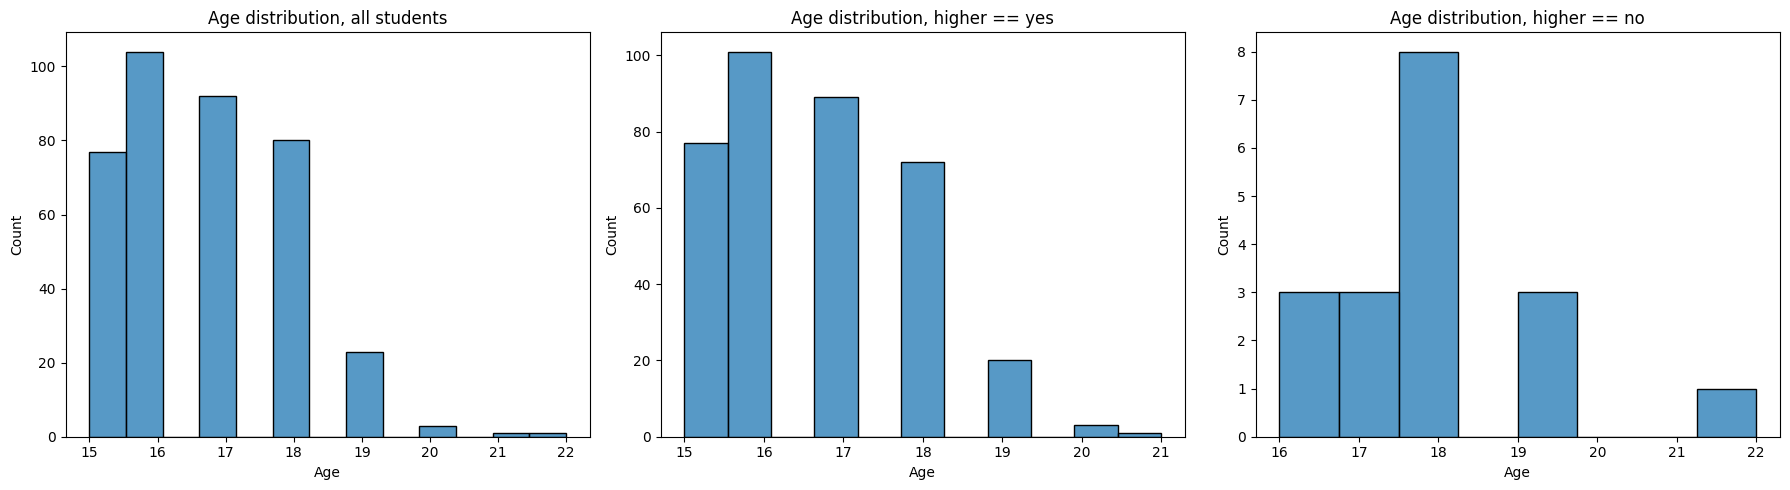

In [15]:
# e)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=student_data, x='age', ax=axes[0])
axes[0].set_title("Age distribution, all students")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

sns.histplot(data=student_data[student_data['higher'] == 'yes'], x='age', ax=axes[1])
axes[1].set_title("Age distribution, higher == yes")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

sns.histplot(data=student_data[student_data['higher'] == 'no'], x='age', ax=axes[2])
axes[2].set_title("Age distribution, higher == no")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show

In [16]:
# f)
student_data["Alcohol"] = student_data["Dalc"] + student_data["Walc"]
student_data["Alcohol"]

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 395, dtype: int64

C:\Users\mohse\AppData\Local\Temp\ipykernel_5008\2857939941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='Alcohol', data=student_data, palette='Set2')


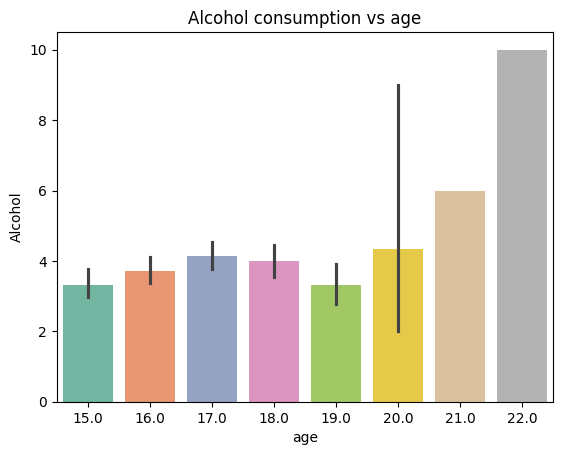

In [17]:
# g)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='age', y='Alcohol', data=student_data, palette='Set2')
plt.title('Alcohol consumption vs age')
plt.show()

In [ ]:
# h)
missing_age = student_data['age'].isna()
missing_age

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Name: age, Length: 395, dtype: bool

In [21]:
median_age = student_data[student_data['age'].isin([16, 17, 18])]['age'].median()
median_age

np.float64(17.0)

In [22]:
student_data.loc[missing_age & (student_data['Alcohol'] < 4), 'age'] = 15
student_data.loc[missing_age & (student_data['Alcohol'] >= 4), 'age'] = median_age

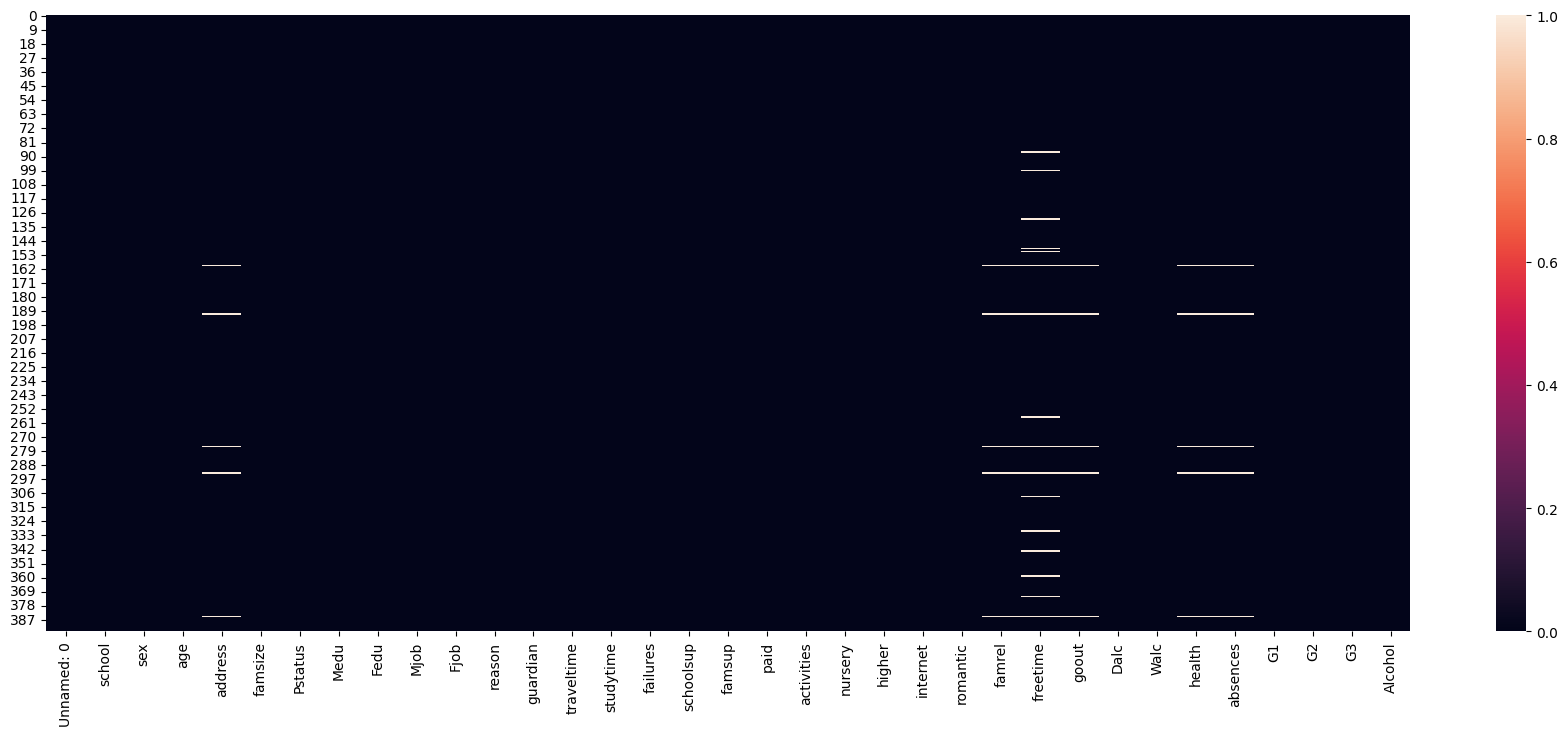

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))
sns.heatmap(student_data.isna())
plt.show()

In [25]:
student_data['age'].isna().sum()

np.int64(0)

---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

In [33]:
student_data['freetime'].isna().sum()

np.int64(16)

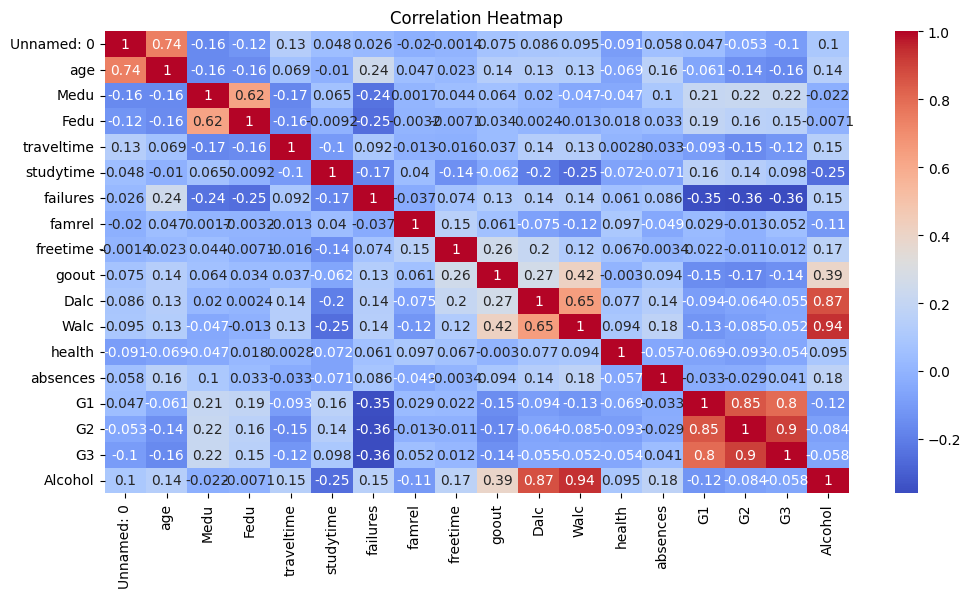

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(student_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
median_freetime = student_data['freetime'].median()
student_data['freetime'].fillna(median_freetime, inplace=True)


C:\Users\mohse\AppData\Local\Temp\ipykernel_5008\275717253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data['freetime'].fillna(median_freetime, inplace=True)


In [38]:
student_data['freetime'].isna().sum()

np.int64(0)

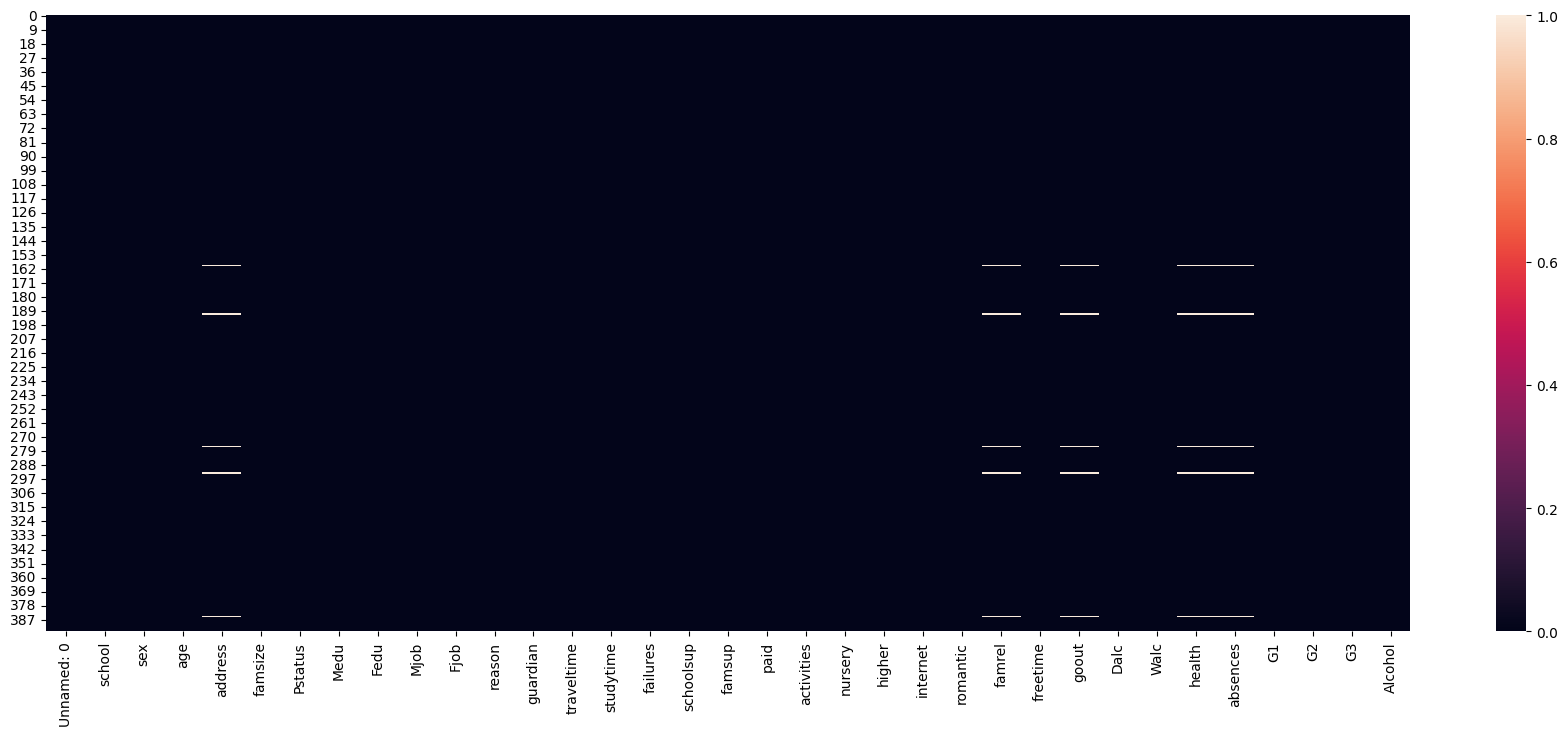

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))
sns.heatmap(student_data.isna())
plt.show()

Det fanns saknade värden i kolumnen 'freetime', som innehåller ordnade numeriska värden från 1 till 5. För att fylla i de saknade värdena valde jag att använda medianen av kolumnen.

Jag valde medianen eftersom:
- Medianen påverkas inte av extremvärden (outliers), vilket gör den till ett robust mått.
- En korrelationsanalys (med heatmap) visade att 'freetime' inte hade någon stark korrelation med andra kolumner, vilket innebär att imputering med hjälp av andra variabler inte skulle ge bättre resultat.

Efter att jag fyllde i de saknade värdena med:
'''python 

student_data['freetime'].fillna(median_freetime, inplace=True)

Verifierade jag att det inte fanns några saknade värden kvar:
- student_data['freetime'].isna().sum()retunerade 0
- En ny värmekarta(sns.heatmap(student_data.isna()))bekräftade att kolumnen var helt ifylld.

Slutsats: Kolumnen freetime har rengjort korrekt och inga saknade värden finns kvar.

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---